# Sanity Checks

In this notebook, we plot **Figures 5(a), 5(b), and 5(c)**. 

**Requirements**:
- You need to run notebook `4-zscores` to get the updated version of the files `beers.csv` in the folder `matched`. In other words, you need to **run the first 7 cells of `4-zscores`**.

**Benchmark time**: This notebook has been run on a Dell Latitude (ElementaryOS 0.4.1 Loki, i7-7600U, 16GB RAM).

In [1]:
import os
os.chdir('..')

In [2]:
# Helpers functions
from python.helpers import parse

# Libraries for preparing data
import json
import gzip
import numpy as np
import pandas as pd
from datetime import datetime

# Libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib

# Folders
data_folder = '../data/'
fig_folder = '../figures/'

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# General info for plotting
colors = {'ba': (232/255,164/255,29/255), 
          'rb': (0/255,152/255,205/255)}

labels = {'ba': 'BeerAdvocate', 'rb': 'RateBeer'}

# Check that folders exist
if not os.path.exists(data_folder + 'tmp'):
    os.makedirs(data_folder + 'tmp')

if not os.path.exists(data_folder + 'prepared'):
    os.makedirs(data_folder + 'prepared')
    
if not os.path.exists(fig_folder):
    os.makedirs(fig_folder)

## Sanity Check on ratings

/home/gayouf/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


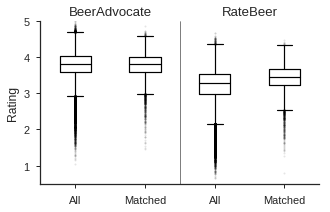

In [3]:
# Get the DF with matching beers
min_nbr_ratings = 5
matched = pd.read_csv(data_folder + 'matched/beers.csv', header=[0,1])
matched = matched[(matched['ba']['nbr_ratings'] >= min_nbr_ratings) & (matched['rb']['nbr_ratings'] >= min_nbr_ratings)]

# Get the DFs for BA and RB
df = {}

df['ba'] = pd.read_csv(data_folder + 'ba/beers.csv')
df['ba'] = df['ba'][df['ba']['nbr_ratings'] >= min_nbr_ratings]

df['rb'] = pd.read_csv(data_folder + 'rb/beers.csv')
df['rb'] = df['rb'][df['rb']['nbr_ratings'] >= min_nbr_ratings]

# Boxplots
plt.figure(figsize=(5, 3), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.1)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

data = [df['ba']['avg_computed'], matched['ba']['avg_computed'], df['rb']['avg_computed'], matched['rb']['avg_computed']]

boxes = ax.boxplot(data, sym='k.')
plt.ylabel('Rating')
plt.plot([2.5, 2.5], [0.5, 5], 'k', linewidth=0.5)
plt.xticks([1, 2, 3, 4], ['All', 'Matched', 'All', 'Matched'])

for b in boxes:
    for l in boxes[b]:
        l.set_linewidth(1.2)
        l.set_color('k')
        if b == 'fliers':
            l.set_alpha(0.1)
            l.set_marker('o')
            l.set_markersize(2)
        
plt.ylim([0.5, 5])

ax.text(1.5, 5.4, 'BeerAdvocate', horizontalalignment='center', verticalalignment='top')
ax.text(3.5, 5.4, 'RateBeer', horizontalalignment='center', verticalalignment='top')

plt.savefig(fig_folder + 'boxplots_ratings.pdf', bbox_inches='tight')

## Sanity Checks on number of ratings per beer

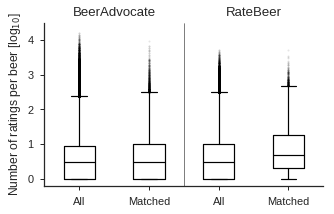

In [4]:
# Get the DF for the matched beers
matched = pd.read_csv(data_folder + 'matched/beers.csv', header=[0,1])

# Get the DF for BA and RB
df = {}

df['ba'] = pd.read_csv(data_folder + 'ba/beers.csv')
df['rb'] = pd.read_csv(data_folder + 'rb/beers.csv')

# Compute some data
data = []
for key in df.keys():   
    arr1 = np.array(df[key]['nbr_ratings'])
    arr1 = arr1[arr1>0]
    
    arr2 = np.array(matched[key]['nbr_ratings'])
    arr2 = arr2[arr2>0]
    
    data.append(np.log10(arr1))
    data.append(np.log10(arr2))
    
# Boxplots
plt.figure(figsize=(5, 3), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.1)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

boxes = ax.boxplot(data, sym='k.')
plt.ylabel('Number of ratings per beer [log$_{10}$]')
plt.plot([2.5, 2.5], [-0.2, 4.5], 'k', linewidth=0.5)
plt.xticks([1, 2, 3, 4], ['All', 'Matched', 'All', 'Matched'])

for b in boxes:
    for l in boxes[b]:
        l.set_linewidth(1.2)
        l.set_color('k')
        if b == 'fliers':
            l.set_alpha(0.1)
            l.set_marker('o')
            l.set_markersize(2)
        
plt.ylim([-0.2, 4.5])

ax.text(1.5, 4.95, 'BeerAdvocate', horizontalalignment='center', verticalalignment='top')
ax.text(3.5, 4.95, 'RateBeer', horizontalalignment='center', verticalalignment='top')

plt.savefig(fig_folder + 'boxplots_nbr_ratings.pdf', bbox_inches='tight')

## Sanity Checks on number of beers per brewery

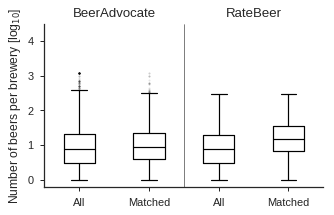

In [5]:
# Get the DF for BA and RB
df = {}

df['ba'] = pd.read_csv(data_folder + 'ba/breweries.csv')
df['rb'] = pd.read_csv(data_folder + 'rb/breweries.csv')

# Get the DF of matched breweries
matched = pd.read_csv(data_folder + 'matched/breweries.csv', header=[0,1])

# Compute some data
data = []
for key in df.keys():   
    arr1 = np.array(df[key]['nbr_beers'])
    arr1 = arr1[arr1>0]
    
    arr2 = np.array(matched[key]['nbr_beers'])
    arr2 = arr2[arr2>0]
    
    data.append(np.log10(arr1))
    data.append(np.log10(arr2))

# Boxplots
plt.figure(figsize=(5, 3), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.1)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

boxes = ax.boxplot(data, sym='k.')
plt.ylabel('Number of beers per brewery [log$_{10}$]')
plt.plot([2.5, 2.5], [-0.2, 4.5], 'k', linewidth=0.5)
plt.xticks([1, 2, 3, 4], ['All', 'Matched', 'All', 'Matched'])

for b in boxes:
    for l in boxes[b]:
        l.set_linewidth(1.2)
        l.set_color('k')
        if b == 'fliers':
            l.set_alpha(0.1)
            l.set_marker('o')
            l.set_markersize(2)
        
plt.ylim([-0.2, 4.5])

ax.text(1.5, 4.95, 'BeerAdvocate', horizontalalignment='center', verticalalignment='top')
ax.text(3.5, 4.95, 'RateBeer', horizontalalignment='center', verticalalignment='top')

plt.savefig(fig_folder + 'boxplots_nbr_beers_breweries.pdf', bbox_inches='tight')